## Association Rule Mining - Data Mining


In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [5]:
#read csv file
df = pd.read_csv('dataset.csv')
display(df)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [6]:
#check data types
df.dtypes

STUDENT ID    object
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
19             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
30             int64
COURSE ID      int64
GRADE          int64
dtype: object

In [7]:
#check null value
df.isna().sum()

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64

In [8]:
#change column name
colname_mapping = {
    '1': 'Student_Age','2': 'Sex','3': 'Grad_High_Sch_Type',
    '4': 'Scholar_Type','5': 'Additional_work',
    '6': 'Reg_Or_Sport','7': 'Partner',
    '8': 'Total_Salary','9': 'Transport',
    '10': 'Accommodation_Type','11': 'Mother_Edu',
    '12': 'Father_Edu','13': 'Siblings',
    '14': 'Parental_Status','15': 'Grad_High_Sch_Type',
    '16': 'Father_Occupation', '17': 'Weekly_Study',
    '18': 'RF_NonScientific', '19': 'RF_Scientific',
    '20': 'Attend_Seminar', '21': 'Impact_Project',
    '22': 'Attend_Class', '23': 'Pre_Midterm_Companion',
    '24': 'Pre_Midterm_Timeline', '25': 'Take_Note',
    '26': 'Listen_Class', '27': 'Discussion',
    '28': 'Flip_Class', '29': 'CGPA',
    '30': 'Expect_CGPA'
}

new_df = df.rename(columns=colname_mapping, inplace=True)
display(df)

,STUDENT ID,Student_Age,Sex,Grad_High_Sch_Type,Scholar_Type,Additional_work,Reg_Or_Sport,Partner,Total_Salary,Transport,...,Pre_Midterm_Companion,Pre_Midterm_Timeline,Take_Note,Listen_Class,Discussion,Flip_Class,CGPA,Expect_CGPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


       Student_Age         Sex  Grad_High_Sch_Type  Scholar_Type  \
count   145.000000  145.000000          145.000000    145.000000   
mean      1.620690    1.600000            1.944828      3.572414   
std       0.613154    0.491596            0.537216      0.805750   
min       1.000000    1.000000            1.000000      1.000000   
25%       1.000000    1.000000            2.000000      3.000000   
50%       2.000000    2.000000            2.000000      3.000000   
75%       2.000000    2.000000            2.000000      4.000000   
max       3.000000    2.000000            3.000000      5.000000   

       Additional_work  Reg_Or_Sport     Partner  Total_Salary   Transport  \
count       145.000000    145.000000  145.000000    145.000000  145.000000   
mean          1.662069      1.600000    1.579310      1.627586    1.620690   
std           0.474644      0.491596    0.495381      1.020245    1.061112   
min           1.000000      1.000000    1.000000      1.000000    1.000000 

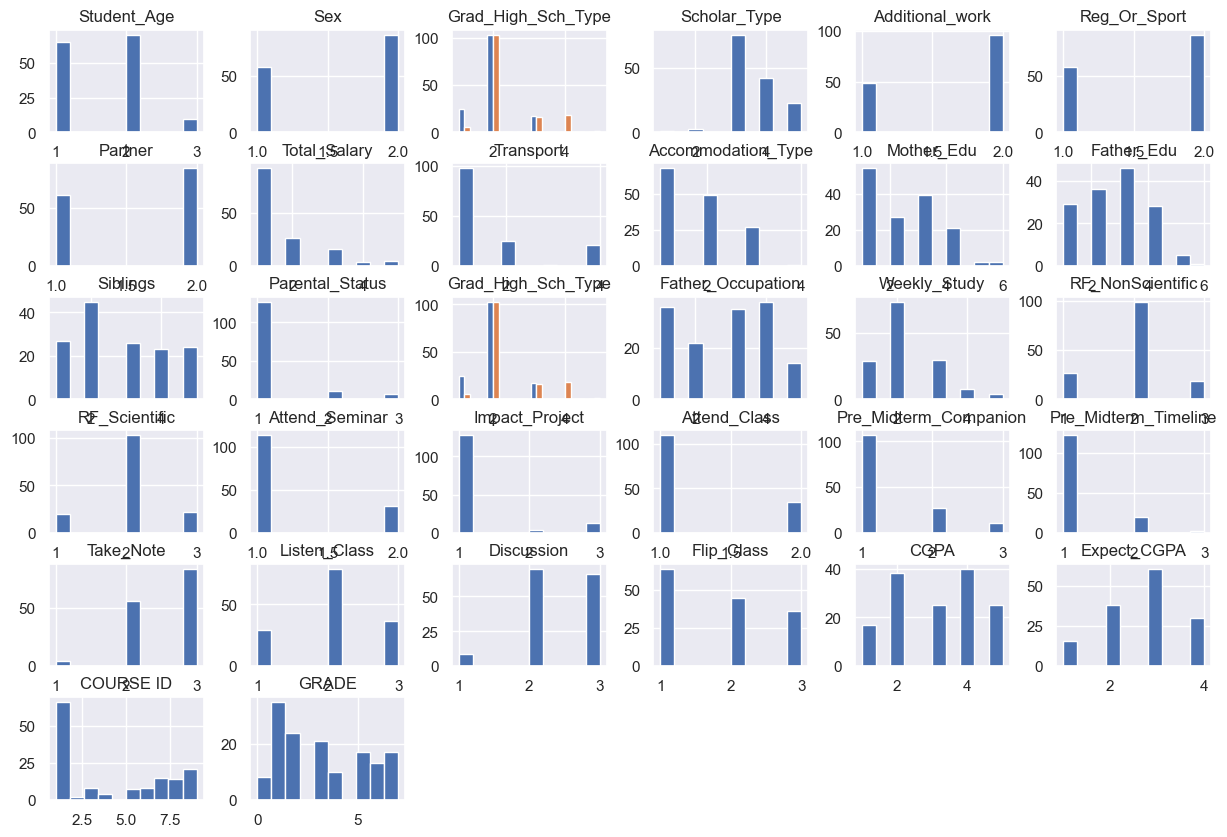

In [9]:
# Data Exploration
print(df.describe())  # Summary statistics
df.hist(figsize=(15, 10))  # Visualization of numerical features
plt.show()